In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("weather_forecast_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [16]:
data["Rain"] = data["Rain"].replace({
    "rain": 1,
    "no rain": 0
})
data.head()

C:\Users\Vamsi\AppData\Local\Temp\ipykernel_18584\3088571849.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Rain"] = data["Rain"].replace({


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [45]:
#Sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(X, y, theta):
    m = X.shape[0]
    y_hat = sigmoid(X @ theta)   # (2500, 1)

    epsilon = 1e-9  # prevents log(0)
    cost = -(1/m) * np.sum(
        y * np.log(y_hat + epsilon) +
        (1 - y) * np.log(1 - y_hat + epsilon)
    )
    return cost


In [46]:
def Gradient(theta, X, y):
    m = X.shape[0]
    y_hat = sigmoid(X @ theta)        # (2500, 1)
    grad = (X.T @ (y_hat - y)) / m    # (6, 1)
    return grad

In [47]:
def Gradient_Descent(theta ,l,X,y):
    theta -= l*Gradient(theta,X,y)
    return theta

In [48]:
X = data[["Temperature","Humidity","Wind_Speed","Cloud_Cover","Pressure"]].values
y = data["Rain"].values

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

In [49]:
m = X.shape[0]
X = np.c_[np.ones(m), X]   # (m, n+1)
y = y.reshape(-1, 1)       # (m, 1)

In [64]:
theta = np.zeros((X.shape[1], 1))
c = 0
l = 0.01
epochs = 10000
m = 2500
losses = []

for i in range(epochs):
    theta = Gradient_Descent(theta, l, X, y)
    current_loss = loss(X, y, theta)
    losses.append(current_loss)

    if i % 1000 == 0:
        print(f"Epoch {i} | Loss: {current_loss}")

Epoch 0 | Loss: 0.6913923882447375
Epoch 1000 | Loss: 0.2704785662323776
Epoch 2000 | Loss: 0.22056753262160803
Epoch 3000 | Loss: 0.19977141031021112
Epoch 4000 | Loss: 0.18807365603269163
Epoch 5000 | Loss: 0.18052420597267899
Epoch 6000 | Loss: 0.17524470319790061
Epoch 7000 | Loss: 0.17135224692903286
Epoch 8000 | Loss: 0.16837278702266667
Epoch 9000 | Loss: 0.16602739959937823


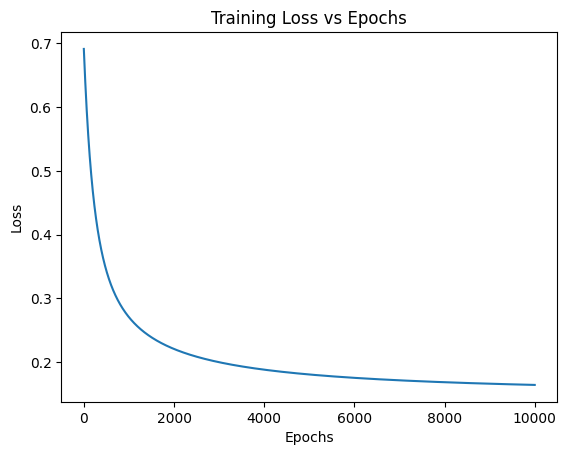

In [65]:
plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.show()